In [228]:
from kan import *
import torch
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from utils import calculate_metrics

# Original Data

In [229]:
# Load the data
df = pd.read_csv('../../data/processed/heart_se.csv')

In [230]:
# Split the data into features and target variable
X = df.drop(['target','index'], axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [231]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values).view(-1, 1) # view is equivalent to reshape in numpy
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values).view(-1, 1)


In [232]:
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_val_tensor,
    'test_label': y_val_tensor
}
# Dataset defined to work with the KAN model


In [233]:
# KAN model training
model = KAN([27,10,1,1], grid=100, k=2) # Define the model 

# Define the accuracy metrics
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())
def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()) 

results = model.fit(dataset, opt="LBFGS", steps=8, metrics=(train_acc, test_acc))

results['train_acc'][-1], results['test_acc'][-1]
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.03e-01 | test_loss: 3.59e-01 | reg: 6.17e+01 | : 100%|█| 8/8 [00:01<00:00,  5.53it/s


saving model version 0.1


In [234]:
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Loss", "Accuracy"))

# Plot train and test loss
fig.add_trace(go.Scatter(x=list(range(len(train_loss))), y=train_loss, mode='lines', name='Train Loss'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(len(test_loss))), y=test_loss, mode='lines', name='Test Loss'), row=1, col=1)

# Plot train and test accuracy
fig.add_trace(go.Scatter(x=list(range(len(train_acc))), y=train_acc, mode='lines', name='Train Accuracy'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(len(test_acc))), y=test_acc, mode='lines', name='Test Accuracy'), row=1, col=2)

# Update layout for better readability
fig.update_layout(
    width=1000, height=500,
    xaxis_title="Epoch",
    yaxis_title="Loss",
    showlegend=True,
    title="Training and Testing Loss and Accuracy",
)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=1)
fig.update_xaxes(title_text="Steps", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=2)

fig.show()

In [235]:
#test model on test data
y_pred = model(X_test_tensor)
y_pred = torch.round(y_pred)
y_pred = y_pred.detach().numpy()
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8524590163934426


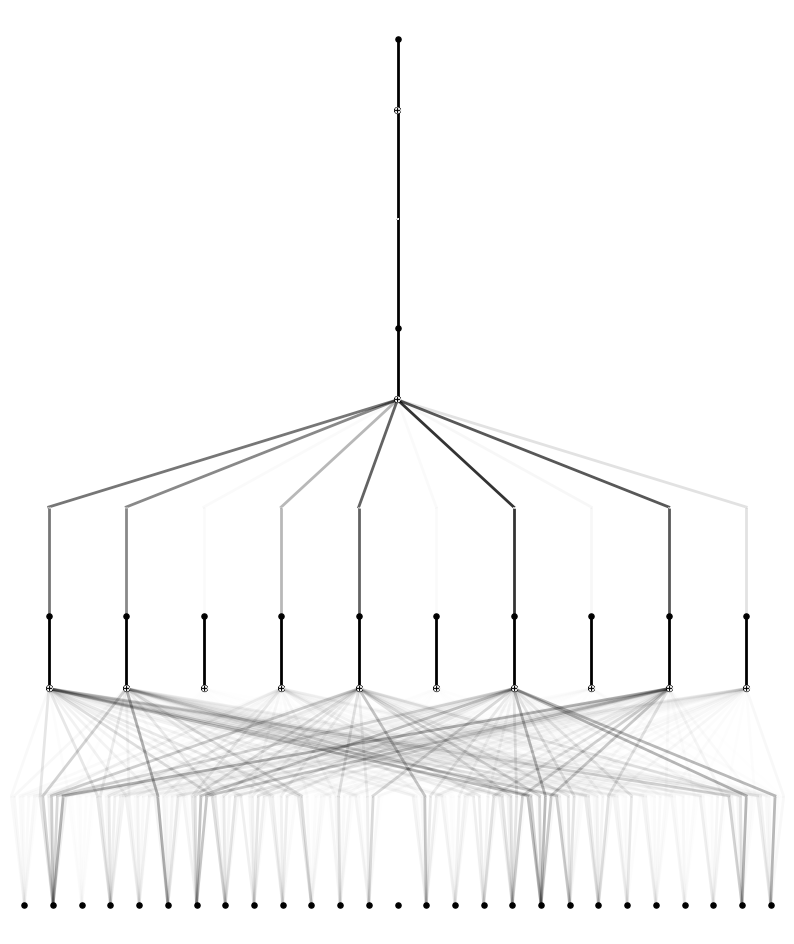

In [236]:
model.plot(scale=1)

In [237]:
model.prune()

saving model version 0.2


MultKAN(
  (act_fun): ModuleList(
    (0-2): 3 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-2): 3 x Symbolic_KANLayer()
  )
)

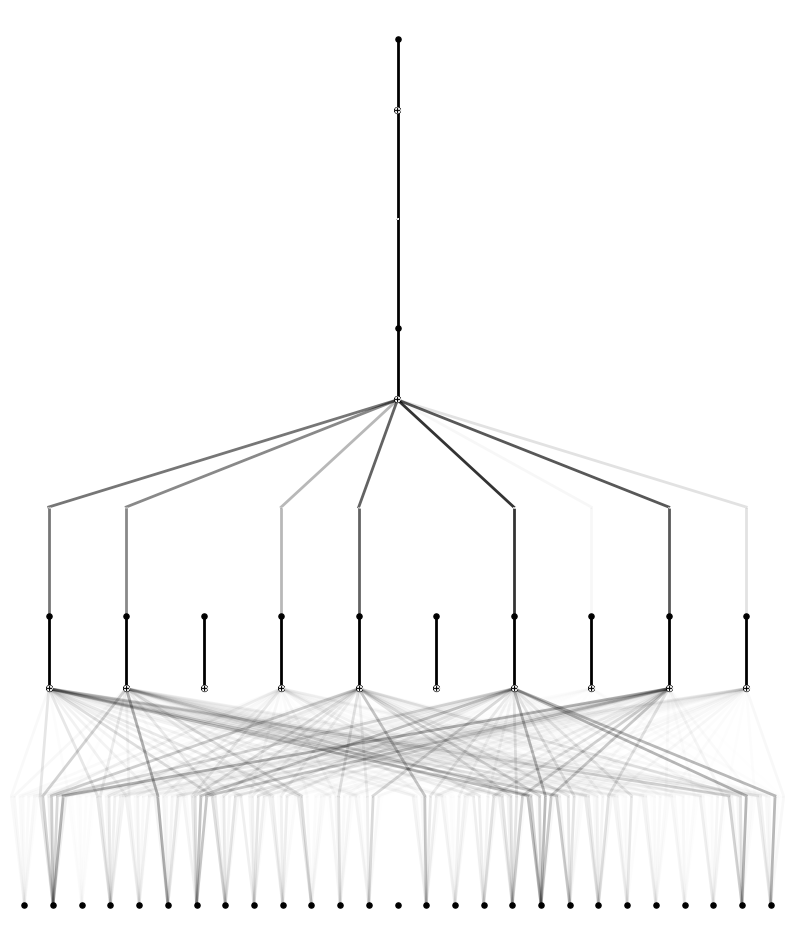

In [238]:
model.plot(scale=1)

In [239]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.6693852543830872, c=1
fixing (0,0,1) with x, r2=0.1325780153274536, c=1
fixing (0,0,2) with 0
fixing (0,0,3) with x, r2=0.36768293380737305, c=1
fixing (0,0,4) with x, r2=0.014413047581911087, c=1
fixing (0,0,5) with 0
fixing (0,0,6) with x, r2=0.07802312076091766, c=1
fixing (0,0,7) with x, r2=0.5773992538452148, c=1
fixing (0,0,8) with x, r2=0.8053388595581055, c=1
fixing (0,0,9) with x, r2=0.753563642501831, c=1
fixing (0,1,0) with x, r2=0.008290891535580158, c=1
fixing (0,1,1) with x, r2=0.0008030582102946937, c=1
fixing (0,1,2) with 0
fixing (0,1,3) with x, r2=0.006120606791228056, c=1
fixing (0,1,4) with x, r2=0.0014714837307110429, c=1
fixing (0,1,5) with 0
fixing (0,1,6) with x, r2=0.02653011865913868, c=1
fixing (0,1,7) with x, r2=0.006409071385860443, c=1
fixing (0,1,8) with x, r2=0.0019773400854319334, c=1
fixing (0,1,9) with x, r2=0.0007295792456716299, c=1
fixing (0,2,0) with x, r2=0.07291989028453827, c=1
fixing (0,2,1) with x, r2=0.04522589221

In [240]:
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)

-0.0217*x_1 - 0.0363*x_10 + 0.0156*x_11 - 0.0273*x_12 + 0.0762*x_13 + 0.039*x_14 - 0.0991*x_15 - 0.0376*x_16 - 0.0448*x_17 + 0.099*x_18 + 0.1742*x_19 + 0.0375*x_2 - 0.1076*x_20 - 0.0597*x_21 - 0.0533*x_22 - 0.0388*x_23 - 0.0458*x_24 - 0.0609*x_25 + 0.1398*x_26 - 0.1013*x_27 - 0.0116*x_3 + 0.0458*x_4 - 0.0433*x_5 - 0.0965*x_6 - 0.1732*x_7 + 0.0472*x_8 + 0.0852*x_9 + 0.5214 - 0.0003*exp(-9.989*x_9) + 0.002*exp(-8.98*x_24) + 0.0063*exp(-3.4*x_24) - 0.e-4*exp(-2.0037*x_22)

In [241]:

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    num_features = X.shape[1]  # Assuming X has 27 features
    logits = []

    for i in range(batch):
        # Initialize substituted formulas
        substituted_formula = formula

        # Substitute all x_1, x_2, ..., x_27 with the corresponding values in X[i, :]
        for j in range(num_features):
            substituted_formula = substituted_formula.subs(f'x_{j+1}', X[i, j])

        # Convert the substituted formulas to floats (assuming they evaluate to scalar values)
        logit1 = np.array(substituted_formula).astype(np.float64)

        # Check if the prediction matches the true label
        correct += np.round(logit1) == y[i]
        logits.append([float(logit1) ,y[i].item()])

    return correct / batch, logits

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label'])[0])
print('test acc of the formula:', acc(formula, X_test_tensor, y_test_tensor)[0])


train acc of the formula: tensor([0.8446])
test acc of the formula: tensor([0.8689])


In [242]:
#plot logits
_, logits = acc(formula, X_test_tensor, y_test_tensor)

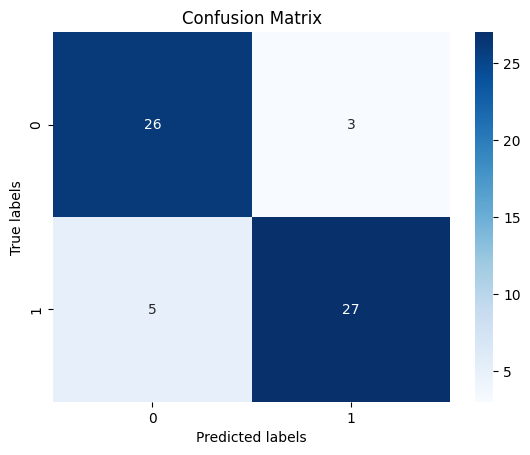

In [243]:
from sklearn.metrics import confusion_matrix, classification_report
logits = np.array(logits)
# Round the logits to generate predictions
y_true = logits[:, 1]
y_pred = np.round(logits[:, 0])

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [244]:
#classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        29
         1.0       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [245]:
calculate_metrics(y_true, y_pred, 'KAN')

Metrics saved to ./results/original/KAN


# Rebalanced

In [246]:
# Load the data
df_train = pd.read_csv('../../data/processed/resampled/heart_resampled_train_se.csv')
df_test = pd.read_csv('../../data/processed/resampled/heart_resampled_test_se.csv')

# Split the data into features and target variable
X_train = df_train.drop(['target','index'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['target','index'], axis=1)
y_test = df_test['target']

In [247]:
# Split the dataset into training and testing sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [248]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values).view(-1, 1) # view is equivalent to reshape in numpy
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values).view(-1, 1)


In [249]:
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_val_tensor,
    'test_label': y_val_tensor
}
# Dataset defined to work with the KAN model


In [250]:
# KAN model training
model = KAN([27,10,1,1], grid=100, k=3) # Define the model 

# Define the accuracy metrics
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())
def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()) 

results = model.fit(dataset, opt="LBFGS", steps=8, metrics=(train_acc, test_acc))

results['train_acc'][-1], results['test_acc'][-1]
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.82e-01 | test_loss: 3.15e-01 | reg: 4.33e+01 | : 100%|█| 8/8 [00:01<00:00,  5.98it/s

saving model version 0.1


In [251]:
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Loss", "Accuracy"))

# Plot train and test loss
fig.add_trace(go.Scatter(x=list(range(len(train_loss))), y=train_loss, mode='lines', name='Train Loss'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(len(test_loss))), y=test_loss, mode='lines', name='Test Loss'), row=1, col=1)

# Plot train and test accuracy
fig.add_trace(go.Scatter(x=list(range(len(train_acc))), y=train_acc, mode='lines', name='Train Accuracy'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(len(test_acc))), y=test_acc, mode='lines', name='Test Accuracy'), row=1, col=2)

# Update layout for better readability
fig.update_layout(
    width=1000, height=500,
    xaxis_title="Epoch",
    yaxis_title="Loss",
    showlegend=True,
    title="Training and Testing Loss and Accuracy",
)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=1)
fig.update_xaxes(title_text="Steps", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=2)

fig.show()

In [252]:
#test model on test data
y_pred = model(X_test_tensor)
y_pred = torch.round(y_pred)
y_pred = y_pred.detach().numpy()
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8541666666666666


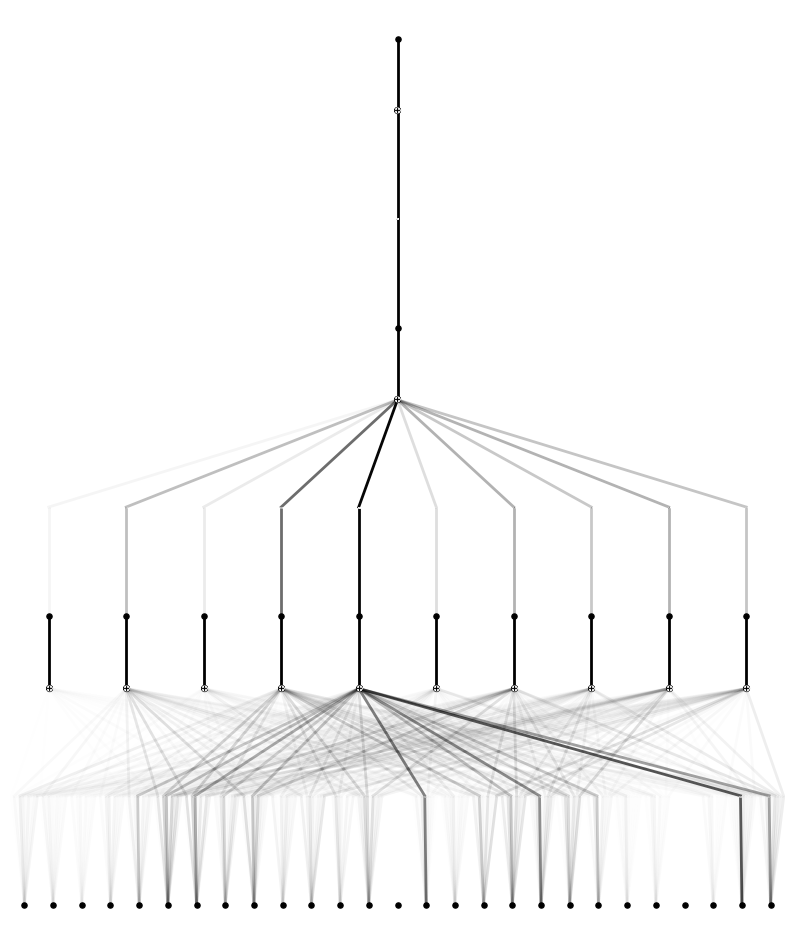

In [253]:
model.plot(scale=1)

In [254]:
model.prune()

saving model version 0.2


MultKAN(
  (act_fun): ModuleList(
    (0-2): 3 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-2): 3 x Symbolic_KANLayer()
  )
)

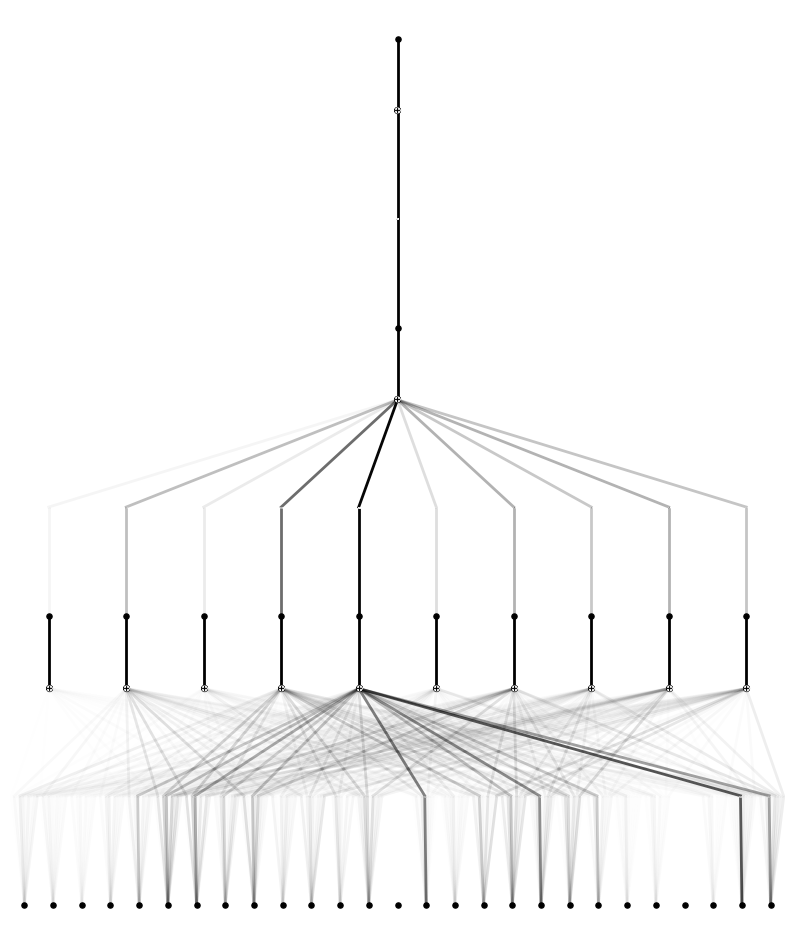

In [255]:
model.plot(scale=1)

In [256]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.5116258859634399, c=1
fixing (0,0,1) with x, r2=0.07272020727396011, c=1
fixing (0,0,2) with x, r2=0.5717697739601135, c=1
fixing (0,0,3) with x, r2=0.9412587285041809, c=1
fixing (0,0,4) with x, r2=0.12868371605873108, c=1
fixing (0,0,5) with x, r2=0.05392185598611832, c=1
fixing (0,0,6) with x, r2=0.094936802983284, c=1
fixing (0,0,7) with x, r2=0.02169710211455822, c=1
fixing (0,0,8) with x, r2=0.6870748400688171, c=1
fixing (0,0,9) with x, r2=0.35609593987464905, c=1
fixing (0,1,0) with x, r2=0.6337432861328125, c=1
fixing (0,1,1) with x, r2=2.2055233785067685e-05, c=1
fixing (0,1,2) with x, r2=0.9412970542907715, c=1
fixing (0,1,3) with x, r2=0.000639638805296272, c=1
fixing (0,1,4) with x, r2=0.096565842628479, c=1
fixing (0,1,5) with x, r2=0.48441243171691895, c=1
fixing (0,1,6) with x, r2=0.5026636719703674, c=1
fixing (0,1,7) with x, r2=0.2578989267349243, c=1
fixing (0,1,8) with x, r2=0.04027669504284859, c=1
fixing (0,1,9) with x, r2=0.02640097588

In [257]:
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)

1.1167 - 1.2913*sin(-0.0391*x_1 - 0.0029*x_10 - 0.018*x_11 - 0.0234*x_12 + 0.0344*x_13 + 0.019*x_15 + 0.0056*x_16 - 0.0473*x_17 + 0.0435*x_18 + 0.003*x_19 + 0.0046*x_2 + 0.0089*x_20 - 0.0205*x_21 - 0.0008*x_22 - 0.0287*x_23 + 0.0314*x_25 + 0.0163*x_26 - 0.0213*x_27 - 0.0116*x_3 + 0.0265*x_4 - 0.0464*x_5 + 0.0658*x_6 - 0.0658*x_7 + 0.034*x_8 + 0.0221*x_9 + 0.0001*exp(2.3165*x_23) - 0.0003*exp(1.0126*x_25) + 0.5478*sin(0.013*x_1 + 0.0408*x_10 - 0.0489*x_11 + 0.0205*x_12 + 0.052*x_13 + 0.2316*x_15 - 0.0445*x_16 + 0.0128*x_17 - 0.094*x_18 - 0.1892*x_19 - 0.0058*x_2 + 0.0595*x_20 + 0.1266*x_21 + 0.0552*x_22 + 0.0522*x_23 - 0.3166*x_26 + 0.1568*x_27 - 0.0371*x_3 - 0.0533*x_4 + 0.196*x_5 + 0.1018*x_6 + 0.1361*x_7 - 0.0785*x_8 - 0.0946*x_9 - 9.1616 - 0.0521*exp(-1.3798*x_25)) - 3.5788 + 0.0001*exp(-9.7596*x_7) + 0.0015*exp(-8.8226*x_23) - 0.0005*exp(-5.288*x_22) - 0.e-4*exp(-9.4168*x_21) + 0.0003*exp(-9.2*x_20) - 0.e-4*exp(-7.4748*x_12) + 0.0001*exp(-1.5983*x_12) - 0.0012*exp(-9.4*x_10))

In [258]:

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    num_features = X.shape[1]  # Assuming X has 27 features
    logits = []

    for i in range(batch):
        # Initialize substituted formulas
        substituted_formula = formula

        # Substitute all x_1, x_2, ..., x_27 with the corresponding values in X[i, :]
        for j in range(num_features):
            substituted_formula = substituted_formula.subs(f'x_{j+1}', X[i, j])

        # Convert the substituted formulas to floats (assuming they evaluate to scalar values)
        logit1 = np.array(substituted_formula).astype(np.float64)

        # Check if the prediction matches the true label
        correct += np.round(logit1) == y[i]
        logits.append([float(logit1) ,y[i].item()])

    return correct / batch, logits

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label'])[0])
print('test acc of the formula:', acc(formula, X_test_tensor, y_test_tensor)[0])


train acc of the formula: tensor([0.8244])
test acc of the formula: tensor([0.8958])


In [259]:
#plot logits
_, logits = acc(formula, X_test_tensor, y_test_tensor)

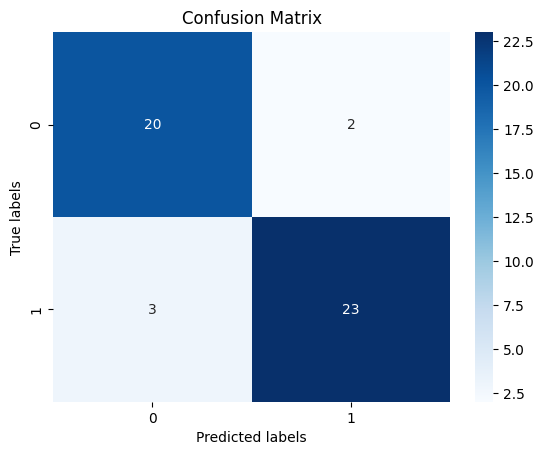

In [260]:
from sklearn.metrics import confusion_matrix, classification_report
logits = np.array(logits)
# Round the logits to generate predictions
y_true = logits[:, 1]
y_pred = np.round(logits[:, 0])

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [261]:
#classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        22
         1.0       0.92      0.88      0.90        26

    accuracy                           0.90        48
   macro avg       0.89      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48



In [262]:
calculate_metrics(y_true, y_pred, 'KAN', True)

Metrics saved to ./results/rebalanced/KAN
